In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip uninstall tensorflow -y

Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Successfully uninstalled tensorflow-2.12.0


In [3]:
!pip install tensorflow==2.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 37.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.1
    Uninstalling tensorboard-data-server-0.7.1:
      Successfully uninstalled 

In [4]:
#1 DATA STUDY
#1º Import dataset
import pandas as pd

path="/content/drive/MyDrive/Colab_Notebooks/UNSW-NB15/UNSW_NB15_training-set.csv"
df = pd.read_csv(path)
print("Read {} rows.".format(len(df)))
df.dropna(inplace=True,axis=1) #For now, just drop NA's (rows with missing values)
print("COLUMNS")
print(df.columns)

Read 82332 rows.
COLUMNS
Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')


In [5]:
#2º Study of datasets

import numpy as np
#Copy df to modify it
df_dataset=df
#Divide into two different datasets to study them
if 'attack_cat' in df_dataset.columns:
  df_labels=df_dataset["attack_cat"]
  df_dataset=df_dataset.drop("attack_cat", axis=1)
if 'label' in df_dataset.columns:
  df_ataqueBinario=df_dataset["label"]
  df_dataset=df_dataset.drop("label", axis=1)
print(df_dataset.columns)
print(df_labels)

#To study each feature
print("COLUMNS: Features")
i=0;
for t in df.dtypes.tolist():
  print(i, t)
  i+=1

#Number of columns
#print (df.shape[1])
print("DATASET")
print(df_dataset.shape[1])

#Types of attacks
AttackTypes = np.unique(df_labels)
print("TYPES OF ATTACKS")
print(AttackTypes)

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')
0        Normal
1        Normal
2        Normal
3        Normal
4        Normal
          ...  
82327    Normal
82328    Normal
82329    Normal
82330    Normal
82331    Normal
Name: attack_cat, Length: 82332, dtype: object
COLUMNS: Features
0 int64
1 float64
2 object
3 object
4 object
5 int64
6 int64
7 int64
8 int64
9 float64
10 int64
11 int64
12 float64
13 float64
14 int64
15 int64
16 float64
17 float64
18 float64
19 float6


82332 rows
** id:82332 (100%)
** dur:39888 (48%)
** proto:131 (0%)
** service:[-:57.27%,dns:25.95%,http:10.07%,smtp:2.25%,ftp:1.89%,ftp-data:1.7%,pop3:0.51%,ssh:0.25%,ssl:0.04%,snmp:0.04%,dhcp:0.03%,radius:0.01%,irc:0.01%]
** state:[FIN:47.78%,INT:41.49%,CON:8.48%,REQ:2.24%,ACC:0.0%,RST:0.0%,CLO:0.0%]
** spkts:420 (0%)
** dpkts:436 (0%)
** sbytes:4489 (5%)
** dbytes:4034 (4%)
** rate:40616 (49%)
** sttl:[254:65.65%,31:20.29%,62:12.6%,0:1.27%,29:0.06%,1:0.05%,255:0.03%,60:0.03%,32:0.02%,30:0.0%,63:0.0%]
** dttl:[0:43.81%,252:35.56%,29:20.24%,60:0.27%,30:0.05%,31:0.04%,253:0.01%,32:0.0%]
** sload:42873 (52%)
** dload:40614 (49%)
** sloss:253 (0%)
** dloss:311 (0%)
** sinpkt:39970 (48%)
** dinpkt:37617 (45%)
** sjit:39944 (48%)
** djit:38381 (46%)
** swin:[255:52.33%,0:47.66%,156:0.0%,202:0.0%,99:0.0%,5:0.0%,67:0.0%,154:0.0%,52:0.0%,245:0.0%,43:0.0%]
** stcpb:39219 (47%)
** dtcpb:39108 (47%)
** dwin:[255:50.3%,0:49.68%,27:0.0%,81:0.0%,160:0.0%,77:0.0%,171:0.0%,137:0.0%,164:0.0%,33:0.0%,2

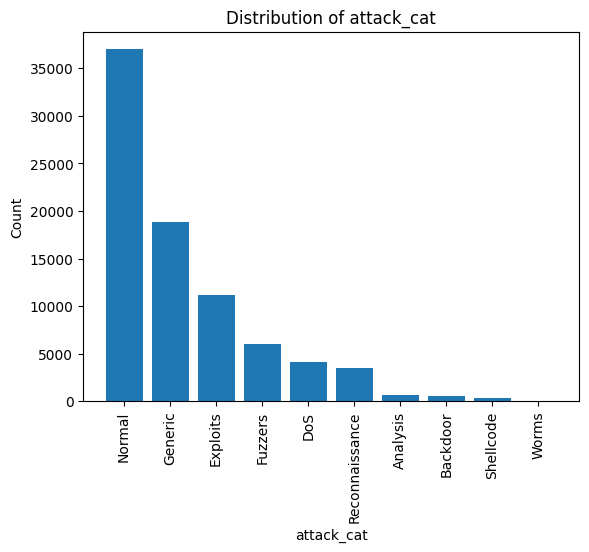

In [6]:
#3º Study of concepts
import pandas as pd
import os
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

path="/content/drive/MyDrive/Colab_Notebooks/UNSW-NB15/UNSW_NB15_training-set.csv"
df = pd.read_csv(path)
#print("Read {} rows.".format(len(df)))
df.dropna(inplace=True,axis=1)

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))

def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,\
                int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])

    #Filter only the attacks
    col = "attack_cat"

    uniques = df[col].unique()
    unique_count = len(uniques)
    if unique_count > 100:
        print("** {}:{} ({}%)".format(col, unique_count, int((unique_count / total) * 100)))
    else:
        print("** {}:{}".format(col, expand_categories(df[col])))
        category_counts = df[col].value_counts()

        # Graph
        fig, ax = plt.subplots()
        ax.bar(category_counts.index, category_counts.values)

        # Adjust axis x
        plt.xticks(rotation=90)

        #Show and plot graph
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.title('Distribution of {}'.format(col))
        plt.show()
analyze(df)

In [7]:
#4º Further study of features for concept selection
proto_counts=df["proto"].value_counts()
used_proto_types = proto_counts.sort_values(ascending=False)#mayor menor
for proto, count in used_proto_types.items():
  print(proto, ',', count)

#Dur -> Threshold
dur_stat=df["dur"].describe()
print(dur_stat)

threshold=0.001
events=df[df['dur'] < threshold]
attacks = events[events['attack_cat'] != 'Normal']
normal = df[(df['dur'] < threshold) & (df['attack_cat'] == 'Normal')]
num_attacks = attacks.shape[0]
num_normal = normal.shape[0]
print("N events", len(events))
print("N attacks", num_attacks)
print("N normal", num_normal)

normal_events=df[df['dur'] > threshold]
normal_attacks = normal_events[normal_events['attack_cat'] != 'Normal']
normal_normal = df[(df['dur'] > threshold) & (df['attack_cat'] == 'Normal')]
num_normal_attacks = normal_attacks.shape[0]
num_normal_normal = normal_normal.shape[0]
print("N events", len(normal_events))
print("N attacks", num_normal_attacks)
print("N normal", num_normal_normal)

tcp , 43095
udp , 29418
unas , 3515
arp , 987
ospf , 676
sctp , 324
any , 96
gre , 88
rsvp , 64
ipv6 , 61
sep , 58
sun-nd , 54
pim , 52
mobile , 52
swipe , 52
leaf-1 , 34
xns-idp , 34
bbn-rcc , 34
prm , 34
ipnip , 33
pup , 33
dcn , 33
hmp , 33
mux , 33
xnet , 33
egp , 33
emcon , 33
trunk-1 , 33
chaos , 33
argus , 33
st2 , 33
netblt , 33
ip , 33
ggp , 33
cbt , 33
nvp , 33
trunk-2 , 33
irtp , 33
iso-tp4 , 33
leaf-2 , 33
rdp , 33
igp , 33
ddp , 32
idpr , 32
3pc , 32
sat-mon , 32
merit-inp , 32
mfe-nsp , 32
ippc , 32
tp++ , 32
idpr-cmtp , 32
i-nlsp , 32
sdrp , 32
ipv6-frag , 32
ipv6-route , 32
idrp , 32
mhrp , 32
rvd , 32
narp , 32
skip , 32
tlsp , 32
kryptolan , 32
wsn , 32
cpnx , 32
gmtp , 32
ipv6-opts , 32
pvp , 32
br-sat-mon , 32
wb-mon , 32
vmtp , 32
ttp , 32
nsfnet-igp , 32
dgp , 32
eigrp , 32
tcf , 32
sprite-rpc , 32
larp , 32
mtp , 32
ax.25 , 32
ipip , 32
aes-sp3-d , 32
micp , 32
encap , 32
pri-enc , 32
ipv6-no , 32
ptp , 32
cftp , 32
sat-expak , 32
iplt , 32
pipe , 32
sps , 32
qnx

In [8]:
pip install tcav

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.4 MB/s eta 0:00:00


In [9]:
# Necessary because jupyter restricts relative imports from parent directories
import os
if os.getcwd().split('/')[-1] != 'tcav':
    print(os.getcwd())
    os.chdir('../')
    os.chdir('../')
    os.chdir('../')
    print(os.getcwd())

/content
/


In [10]:
from tensorflow.io import gfile
from tcav.utils import create_session

# 1º Make source directory para las siguientes operaciones
!rm -rf ./tcav/tcav_examples/discrete/unsw_sanity2/* #errase previous data
source_dir = "./tcav/tcav_examples/discrete/unsw_sanity2"
working_dir = source_dir

acts_dir = os.path.join(working_dir, "activations")#path inside working_dir
gfile.makedirs(acts_dir) #create dir

cav_dir = os.path.join(working_dir, "cav")
gfile.makedirs(cav_dir)

!ls ./tcav/tcav_examples/discrete/unsw_sanity2/

activations  cav


In [11]:
#2 MAKE CONCEPTS
import pandas as pd
import argparse
from tensorflow.io import gfile
import os

def make_concepts_targets_and_randoms(source_dir):

  path="/content/drive/MyDrive/Colab_Notebooks/UNSW-NB15/UNSW_NB15_training-set.csv"
  df = pd.read_csv(path)
  df.dropna(inplace=True,axis=1)

  #1º CONCEPT DEFINITION AND FOLDERS
  # Make concept folders with the csv files
  def make_concept_folder(df, concept):
    # Create the folder and save the dataframe as a csv file there
    path = os.path.join(source_dir, concept)
    if not gfile.exists(path):
      gfile.makedirs(path)

    concept_file_name = os.path.join(path, concept + ".csv")
    df.to_csv(concept_file_name, index=False)

  """concept_true = df[df["is_sm_ips_ports"] == 1]
  concept_false = df[df["is_sm_ips_ports"] == 0]

  make_concept_folder(concept_true,
                      "is_sm_ips_ports_true")
  make_concept_folder(concept_false,
                      "is_sm_ips_ports_false)"""
  #PROTOCOL BASED CONCEPTS: TCP, UDP, ICMP
  tcp_df = df[df["proto"] == "tcp"]
  udp_df = df[df["proto"] == "udp"]
  make_concept_folder(tcp_df, "protocol_tcp")
  make_concept_folder(udp_df, "protocol_udp")
  #SERVICE TYPES CONCEPTS
  dns_df = df[df["service"] == "dns"]
  http_df = df[df["service"] == "http"]
  make_concept_folder(dns_df, "service_dns")
  make_concept_folder(http_df, "service_http")
  """#CONNECTION DURATION CONCEPTS
  umbral=0.001
  short_dur_df = df[df["dur"] > umbral]
  long_dur_df = df[df["dur"] < umbral]
  make_concept_folder(short_dur_df, "duration_short")
  make_concept_folder(long_dur_df, "duration_long")"""
  #ESTADO CONEXIONES CONCEPTS
  fin_df = df[df["state"] == "FIN"] #finished
  int_df = df[df["state"] == "INT"] #intermediate
  con_df = df[df["state"] == "CON"] #stablished
  req_df = df[df["state"] == "REQ"] #required
  make_concept_folder(fin_df, "state_fin")
  make_concept_folder(int_df, "state_int")
  make_concept_folder(con_df, "state_con")
  make_concept_folder(req_df, "state_req")
  #TIME TO LIVE
  #STTL: from src
  big_df = df[df["sttl"] == 254]
  small_df = df[df["sttl"] == 31]
  medium_df = df[df["sttl"] == 62]
  make_concept_folder(big_df, "sttl_big")
  make_concept_folder(small_df, "sttl_small")
  make_concept_folder(medium_df, "sttl_medium")
  #DTTL: to dst
  null_df = df[df["dttl"] == 0]
  big_df = df[df["dttl"] == 252]
  medium_df = df[df["dttl"] == 29]
  make_concept_folder(null_df, "dttl_null")
  make_concept_folder(big_df, "dttl_big")
  make_concept_folder(medium_df, "dttl_medium")
  #CONCEPTS
  concepts_protocol=["protocol_tcp", "protocol_udp"]
  concepts_service=["service_dns",  "service_http"]
  """concepts_dur=["duration_short", "duration_long"]"""
  concepts_state=["state_fin",  "state_int", "state_con", "state_req"]
  concepts_sttl=["sttl_big",  "sttl_small"]
  concepts_dttl=["dttl_null",  "dttl_big", "dttl_medium"]
  #Print
  print("Available concepts for UNSW_NB15 dataset are: ")
  #print(["is_sm_ips_ports_true","is_sm_ips_ports_false"])
  print(concepts_protocol)
  print(concepts_service)
  """print(concepts_dur)"""
  print(concepts_state)
  print(concepts_sttl)
  print(concepts_dttl)
  print("\n")

  #2º MAKE RANDOM EXAMPLES
  # Making random_examples
  random_size = 10
  random_partitions = 11
  for i in range(random_partitions):
    random_partition_name = "random500_" + str(i)
    randoms = df.sample(random_size)
    make_concept_folder(randoms, random_partition_name)
  print("Created 10 random folders \n")

  #3º MAKE LABELS.TXT WITH ALL ATTACK TYPES
  # Make target folder
  targets = df.attack_cat.unique()
  print("Available targets for UNSW_NB15 dataset are: ")
  print(targets)
  print("\n")
  for target in targets:
    target_df = df[df["attack_cat"] == target]
    make_concept_folder(target_df, target)
  # make labels
  with open(os.path.join(source_dir, "labels.txt"), "w") as the_file:
    for target in targets:
      the_file.write(target + "\n")

#4º IMPLEMENT FUNCTION
if not gfile.exists(source_dir):
  gfile.makedirs(os.path.join(source_dir))
  print("Created source directory at " + source_dir)
# Make data
!rm -rf ./tcav/tcav_examples/discrete/unsw_sanity2/*
make_concepts_targets_and_randoms(source_dir)
print("Successfully created data at " + source_dir)
!ls ./tcav/tcav_examples/discrete/unsw_sanity2/

Available concepts for UNSW_NB15 dataset are: 
['protocol_tcp', 'protocol_udp']
['service_dns', 'service_http']
['state_fin', 'state_int', 'state_con', 'state_req']
['sttl_big', 'sttl_small']
['dttl_null', 'dttl_big', 'dttl_medium']


Created 10 random folders 

Available targets for UNSW_NB15 dataset are: 
['Normal' 'Reconnaissance' 'Backdoor' 'DoS' 'Exploits' 'Analysis'
 'Fuzzers' 'Worms' 'Shellcode' 'Generic']


Successfully created data at ./tcav/tcav_examples/discrete/unsw_sanity2
Analysis     Generic	   random500_2	Reconnaissance	sttl_big
Backdoor     labels.txt    random500_3	service_dns	sttl_medium
DoS	     Normal	   random500_4	service_http	sttl_small
dttl_big     protocol_tcp  random500_5	Shellcode	Worms
dttl_medium  protocol_udp  random500_6	state_con
dttl_null    random500_0   random500_7	state_fin
Exploits     random500_1   random500_8	state_int
Fuzzers      random500_10  random500_9	state_req


In [12]:
#Verify labels
with open("./tcav/tcav_examples/discrete/unsw_sanity2/labels.txt", "r") as file:
    content = file.read()
    print(content)
print(df_labels.unique())
print(type(df_labels))
print(type(content))

Normal
Reconnaissance
Backdoor
DoS
Exploits
Analysis
Fuzzers
Worms
Shellcode
Generic

['Normal' 'Reconnaissance' 'Backdoor' 'DoS' 'Exploits' 'Analysis'
 'Fuzzers' 'Worms' 'Shellcode' 'Generic']
<class 'pandas.core.series.Series'>
<class 'str'>


In [13]:
#3 CREATE MODEL

from __future__ import division
from __future__ import print_function
import os
import tensorflow as tf
import argparse
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.datasets
from sklearn.preprocessing import OrdinalEncoder

# Types of the columns in the dataset
kFloatIndices = [1, 9, 12, 13, 16, 17, 18, 19, 24, 25, 26]
kIntIndices = [
    0, 5, 6, 7, 8, 10, 11, 14, 15, 20, 21, 22, 23, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42
]
kBytesIndices = [2, 3, 4]

#1º PRE-PROCESS DATASET
def encode_variables(data):
  #Encodes categorical variables with Ordinal Encoding
  data2 = np.copy(data)#independent copy
  encoder = OrdinalEncoder()
  categorical_indices = kBytesIndices
  data2[:,
        categorical_indices] = encoder.fit_transform(data2[:,
                                                           categorical_indices])
  return data2

def encoding_function(x, label_path):
  #Matches a label's name with the index from the labels.txt file
  # Open label file and get indices
  with tf.io.gfile.GFile(label_path, 'r') as f:
    labels = [l.strip().split(' ')[0] for l in f.readlines()]
  return labels.index(x)

def encode_labels(labels, label_path):
  #Encoding labels according to order in the labels file, so it is compliant with ModelWrapper
  labels2 = np.copy(labels)
  encoded = [encoding_function(x, label_path) for x in labels2]
  return encoded

def create_categorical_map(data):
  categorical_indices = kBytesIndices
  # Takes form {index : number of unique values}
  categorical_map = {}
  for index in categorical_indices:
    categorical_map[index] = np.unique(data[:, [index]]).shape[0]
  return categorical_map


def prepare_dataset(labels_path):
  path="/content/drive/MyDrive/Colab_Notebooks/UNSW-NB15/UNSW_NB15_training-set.csv"
  df = pd.read_csv(path)
  df.dropna(inplace=True,axis=1)
  df_dataset=df
  if 'attack_cat' in df_dataset.columns:
    df_labels=df_dataset["attack_cat"]
    df_dataset=df_dataset.drop("attack_cat", axis=1)
  if 'label' in df_dataset.columns:
    df_dataset=df_dataset.drop("label", axis=1)

  data = np.array(df_dataset)
  labels = np.array(df_labels)
  encoded_data = encode_variables(data)
  encoded_labels = encode_labels(labels, labels_path)
  return encoded_data, encoded_labels

#2º CREATE MODEL
#Simple feedforward model with embedding representation for categorical variables
def make_keras_model(categorical_map):
  n_features = 43
  n_labels = 10
  # Make all placeholders
  inputs = []
  models = []

  input_layer = tf.keras.layers.Input(shape=(n_features,), name='input')
  inputs.append(input_layer)
  # Splits the input vector into multiple variables
  deconcat = tf.split(input_layer, [1 for i in range(n_features)], 1)
  for index in range(n_features):
    # For categorical variables, we create embedding layers
    if index in categorical_map.keys():
      vocab_size = categorical_map[index]
      inpt = deconcat[index]
      inputs.append(inpt)
      embed = tf.keras.layers.Embedding(vocab_size, 200, \
                                        trainable=True,
                                        embeddings_initializer=tf.compat.v1.initializers.random_normal())(inpt)

      embed_reshaped = tf.keras.layers.Reshape(target_shape=(200,))(embed)
      models.append(embed_reshaped)
    else:
      # Else, create a simple input for numerical features
      inpt = deconcat[index]
      inputs.append(inpt)
      models.append(inpt)
  # Concatenate them into a single vector
  merge_models = tf.keras.layers.concatenate(models)

  # Plug them into the DNN
  net = tf.keras.layers.Dense(1000, activation='relu')(merge_models)
  net = tf.keras.layers.BatchNormalization()(net)
  net = tf.keras.layers.Dense(256, activation='relu')(net)
  net = tf.keras.layers.BatchNormalization()(net)

  pred = tf.keras.layers.Dense(n_labels, activation='sigmoid')(net)
  model_full = tf.keras.models.Model(inputs=input_layer, \
                                     outputs=pred)
  model_full.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), \
                     metrics=['accuracy'],
                     optimizer='adam')
  return model_full

#3º TRAIN AND SAVE MODEL
def train_and_save_model(model_path, labels_path):
  # Prepare dataset and split it
  data, labels = prepare_dataset(labels_path)
  train_data, test_data, train_labels, test_labels = train_test_split(
      data, labels, test_size=0.2)

  train_data = np.array(train_data)
  test_data = np.array(test_data)
  train_labels = np.array(train_labels)
  test_labels = np.array(test_labels)

  # Create categorical map for the embedding layer
  categorical_map = create_categorical_map(data)
  model = make_keras_model(categorical_map)

  print(model.summary())
  model.fit(
      train_data,
      train_labels,
      validation_data=(test_data, test_labels),
      epochs=4,
      batch_size=64)
  model.save(model_path)

  # Test on a small subset of predictions
  predictions = model.predict(test_data[:10])
  print(predictions)

In [14]:
#4 MODEL WRAPPER
#from tcav.tcav_examples.discrete.kdd99_model import train_and_save_model
from tcav.model import KerasModelWrapper
import tensorflow as tf

class UNSW_NB15KerasModelWrapper(KerasModelWrapper):
  def __init__(self, sess, model_path, labels_path):
    if not tf.io.gfile.exists(labels_path):
      raise Exception(
          "Labels path does not exist. Please provide a labels file.")
    # Train a model if we have none
    if not tf.io.gfile.exists(model_path):
      train_and_save_model(model_path, labels_path)

    # Initialize the wrapper
    super(UNSW_NB15KerasModelWrapper, self).__init__(sess, model_path, labels_path)

    # Using SparseCategoricalCrossEntropy here
    self.y_input = tf.compat.v1.placeholder(tf.float64, shape=[None])
    self.loss = self.model.loss_functions[0](self.y_input,
                                             self.model.outputs[0])
    self._make_gradient_tensors()

In [15]:
# Call functions to create, train and save model
if os.path.exists("./tcav/tcav_examples/discrete/unsw_sanity2/unswnb15_2.h5"):
  os.remove("./tcav/tcav_examples/discrete/unsw_sanity2/unswnb15_2.h5")
label_path = os.path.join(source_dir, "labels.txt")
model_path = os.path.join(source_dir, "unswnb15_2.h5")

uci_model = UNSW_NB15KerasModelWrapper(create_session(), model_path, label_path)

Instructions for updating:
Colocations handled automatically by placer.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 43)]         0           []                               
                                                                                                  
 tf_op_layer_split (TensorFlowO  [(None, 1),         0           ['input[0][0]']                  
 pLayer)                         (None, 1),                                                       
                                 (None, 1),                                                       
                                 (None, 1),                                                       
                                 (None, 1),                                                       
                                 (None, 1),                                                   

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


                                                                                                  
 reshape_1 (Reshape)            (None, 200)          0           ['embedding_1[0][0]']            
                                                                                                  
 reshape_2 (Reshape)            (None, 200)          0           ['embedding_2[0][0]']            
                                                                                                  
 concatenate (Concatenate)      (None, 640)          0           ['tf_op_layer_split[0][0]',      
                                                                  'tf_op_layer_split[0][1]',      
                                                                  'reshape[0][0]',                
                                                                  'reshape_1[0][0]',              
                                                                  'reshape_2[0][0]',              
          

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


65865/65865 [==============================] - 26s 388us/sample - loss: 1.2610 - accuracy: 0.6139 - val_loss: 1.2255 - val_accuracy: 0.6211
Epoch 2/4
65865/65865 [==============================] - 26s 402us/sample - loss: 1.1883 - accuracy: 0.6209 - val_loss: 1.1980 - val_accuracy: 0.6287
Epoch 3/4
65865/65865 [==============================] - 26s 398us/sample - loss: 1.1597 - accuracy: 0.6255 - val_loss: 1.3200 - val_accuracy: 0.5934
Epoch 4/4
65865/65865 [==============================] - 25s 384us/sample - loss: 1.0529 - accuracy: 0.6521 - val_loss: 1.0702 - val_accuracy: 0.6599


/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[[0.9746579  0.55105805 0.08643883 0.47977808 0.89870775 0.06179747
  0.82875246 0.0382041  0.24356124 0.4265402 ]
 [0.9863715  0.4129349  0.12536082 0.39537805 0.594004   0.09397811
  0.4398116  0.03380665 0.05506989 0.6969698 ]
 [0.9876084  0.72552025 0.05239108 0.66726047 0.944913   0.21157858
  0.87550247 0.0268245  0.11669931 0.6734797 ]
 [0.9851819  0.40318552 0.03685829 0.3931087  0.89626396 0.02856797
  0.8283969  0.0150196  0.23893735 0.31663764]
 [0.8178428  0.5186066  0.18032831 0.28949276 0.4958657  0.12797505
  0.64752096 0.00443831 0.08641973 0.9524677 ]
 [0.54906476 0.6093369  0.24277133 0.41626155 0.5958956  0.18330482
  0.6299802  0.0050438  0.09078696 0.94786656]
 [0.98068726 0.82179964 0.06133458 0.75897974 0.96587336 0.3714903
  0.92069757 0.0283975  0.10134506 0.745156  ]
 [0.41195524 0.6878811  0.38231158 0.73654234 0.8087268  0.38282713
  0.67299914 0.00465178 0.1360184  0.33857617]
 [0.9824141  0.70776963 0.04592592 0.66318554 0.9433658  0.18479201
  0.8579416  

In [16]:
#5 ACTIVATION VECTORS
import os
from tcav.activation_generator import DiscreteActivationGeneratorBase
import numpy as np
import tensorflow as tf

class UNSW_NB15DiscreteActivationGenerator(DiscreteActivationGeneratorBase):
  def __init__(self, model, source_dir, acts_dir, max_examples):
    self.source_dir = source_dir
    super(UNSW_NB15DiscreteActivationGenerator,
          self).__init__(model, source_dir, acts_dir, max_examples)

  def load_data(self, concept):
    concept_folder = os.path.join(self.source_dir, concept)
    concept_file = os.path.join(concept_folder, concept + '.csv')
    with tf.io.gfile.GFile(concept_file, 'r') as f:
      texts = [
          l.strip().split(',') for l in f.readlines()[:self.max_examples + 1]
      ]
    texts = np.array(texts, dtype='O')
    texts = texts[1:]  # remove headers
    texts = texts[:, :-2]  # remove labels y binario
    #texts = self._convert_types(texts)  # Assign proper data types
    return texts

  def transform_data(self, data):
    encoded_data = encode_variables(data)
    return encoded_data

  def _convert_types(self, texts):
    texts[:, kBytesIndices] = texts[:, kBytesIndices].astype(str)
    texts[:, kFloatIndices] = texts[:, kFloatIndices].astype(np.float32)
    texts[:, kIntIndices] = texts[:, kIntIndices].astype(np.int)
    return texts

In [17]:
#Call the activation vectors class
!rm -rf ./tcav/tcav_examples/discrete/kdd_sanity2/activations/*
!rm -rf ./tcav/tcav_examples/discrete/kdd_sanity2/cav/*
act_gen = UNSW_NB15DiscreteActivationGenerator(model=uci_model, source_dir=source_dir, acts_dir=acts_dir, max_examples=200)

Class = Normal
  Concept = protocol_tcp
    Bottleneck = dense. TCAV Score = 0.38 (+- 0.19), random was 0.49 (+- 0.25). p-val = 0.216 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.20 (+- 0.29), random was 0.47 (+- 0.37). p-val = 0.033 (significant)
  Concept = protocol_udp
    Bottleneck = dense. TCAV Score = 0.11 (+- 0.01), random was 0.49 (+- 0.25). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.42 (+- 0.40), random was 0.47 (+- 0.37). p-val = 0.707 (not significant)
{'dense': {'bn_vals': [0.01, 0.1085], 'bn_stds': [0, 0.013047988350699887], 'significant': [False, True]}, 'dense_1': {'bn_vals': [0.1995, 0.01], 'bn_stds': [0.2920911672748767, 0], 'significant': [True, False]}}


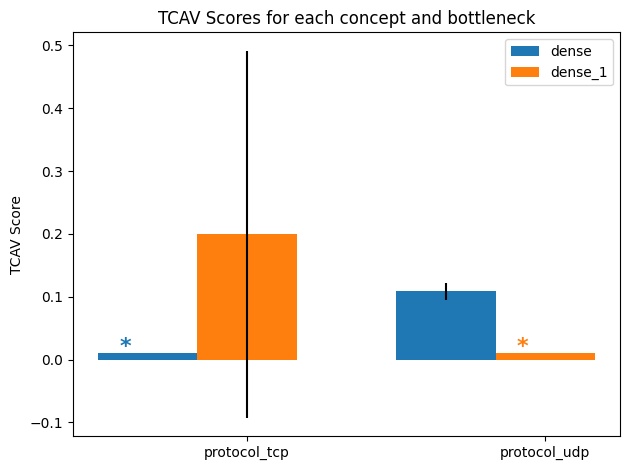

Class = Generic
  Concept = protocol_tcp
    Bottleneck = dense. TCAV Score = 0.60 (+- 0.32), random was 0.57 (+- 0.41). p-val = 0.860 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.44 (+- 0.47), random was 0.48 (+- 0.47). p-val = 0.788 (not significant)
  Concept = protocol_udp
    Bottleneck = dense. TCAV Score = 0.12 (+- 0.29), random was 0.57 (+- 0.41). p-val = 0.001 (significant)
    Bottleneck = dense_1. TCAV Score = 0.21 (+- 0.40), random was 0.48 (+- 0.47). p-val = 0.085 (not significant)
{'dense': {'bn_vals': [0.01, 0.11749999999999998], 'bn_stds': [0, 0.2909660633132325], 'significant': [False, True]}, 'dense_1': {'bn_vals': [0.01, 0.01], 'bn_stds': [0, 0], 'significant': [False, False]}}


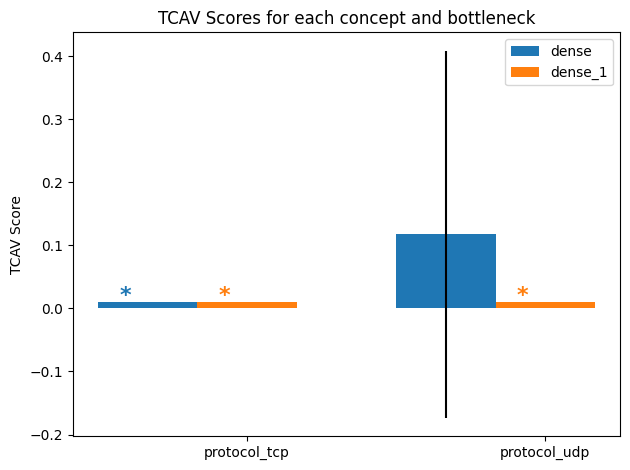

Class = Exploits
  Concept = protocol_tcp
    Bottleneck = dense. TCAV Score = 0.83 (+- 0.15), random was 0.50 (+- 0.34). p-val = 0.003 (significant)
    Bottleneck = dense_1. TCAV Score = 0.91 (+- 0.21), random was 0.53 (+- 0.45). p-val = 0.012 (significant)
  Concept = protocol_udp
    Bottleneck = dense. TCAV Score = 0.87 (+- 0.19), random was 0.50 (+- 0.34). p-val = 0.001 (significant)
    Bottleneck = dense_1. TCAV Score = 0.62 (+- 0.45), random was 0.53 (+- 0.45). p-val = 0.561 (not significant)
{'dense': {'bn_vals': [0.8324999999999999, 0.868], 'bn_stds': [0.14842927608797396, 0.1869786084021378], 'significant': [True, True]}, 'dense_1': {'bn_vals': [0.908, 0.01], 'bn_stds': [0.21166246714994136, 0], 'significant': [True, False]}}


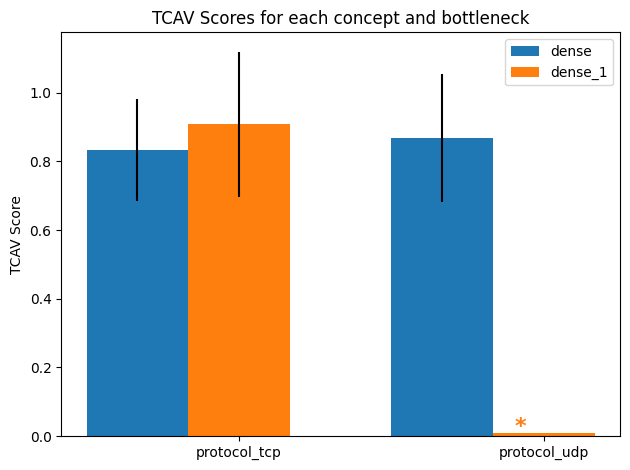

Class = Fuzzers
  Concept = protocol_tcp
    Bottleneck = dense. TCAV Score = 0.47 (+- 0.25), random was 0.47 (+- 0.31). p-val = 0.997 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.68 (+- 0.37), random was 0.47 (+- 0.43). p-val = 0.148 (not significant)
  Concept = protocol_udp
    Bottleneck = dense. TCAV Score = 0.92 (+- 0.13), random was 0.47 (+- 0.31). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.77 (+- 0.33), random was 0.47 (+- 0.43). p-val = 0.036 (significant)
{'dense': {'bn_vals': [0.01, 0.921], 'bn_stds': [0, 0.13222707740852474], 'significant': [False, True]}, 'dense_1': {'bn_vals': [0.01, 0.773], 'bn_stds': [0, 0.33289788224018485], 'significant': [False, True]}}


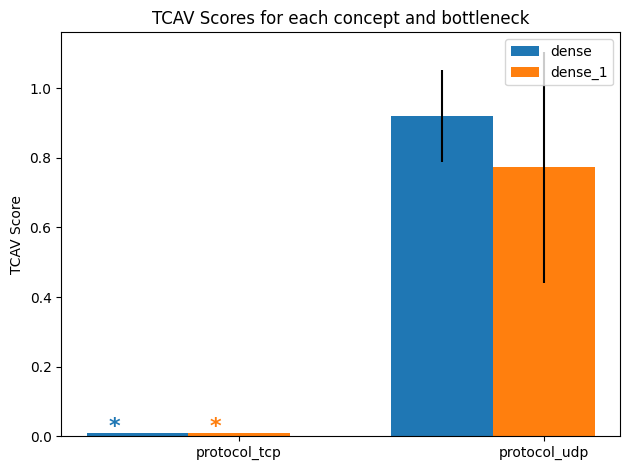

Class = DoS
  Concept = protocol_tcp
    Bottleneck = dense. TCAV Score = 0.65 (+- 0.14), random was 0.46 (+- 0.32). p-val = 0.078 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.50 (+- 0.35), random was 0.51 (+- 0.46). p-val = 0.939 (not significant)
  Concept = protocol_udp
    Bottleneck = dense. TCAV Score = 0.97 (+- 0.04), random was 0.46 (+- 0.32). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.54 (+- 0.46), random was 0.51 (+- 0.46). p-val = 0.849 (not significant)
{'dense': {'bn_vals': [0.01, 0.9710000000000001], 'bn_stds': [0, 0.04294182110716777], 'significant': [False, True]}, 'dense_1': {'bn_vals': [0.01, 0.01], 'bn_stds': [0, 0], 'significant': [False, False]}}


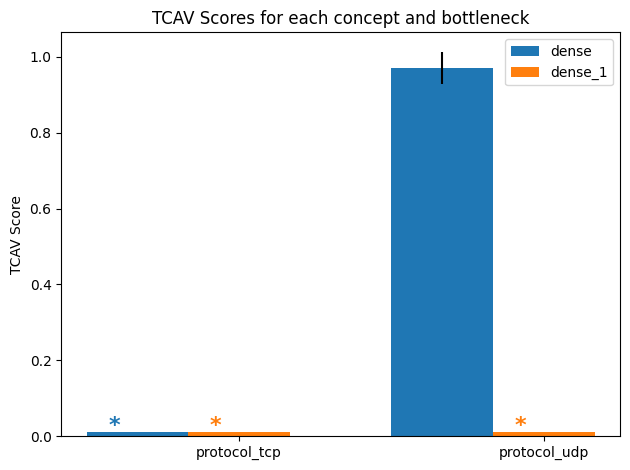

Class = Reconnaissance
  Concept = protocol_tcp
    Bottleneck = dense. TCAV Score = 0.68 (+- 0.14), random was 0.50 (+- 0.25). p-val = 0.027 (significant)
    Bottleneck = dense_1. TCAV Score = 0.88 (+- 0.30), random was 0.46 (+- 0.42). p-val = 0.003 (significant)
  Concept = protocol_udp
    Bottleneck = dense. TCAV Score = 0.75 (+- 0.08), random was 0.50 (+- 0.25). p-val = 0.002 (significant)
    Bottleneck = dense_1. TCAV Score = 0.38 (+- 0.28), random was 0.46 (+- 0.42). p-val = 0.557 (not significant)
{'dense': {'bn_vals': [0.6759999999999999, 0.7535000000000001], 'bn_stds': [0.14229898102235305, 0.07729974126735484], 'significant': [True, True]}, 'dense_1': {'bn_vals': [0.8795, 0.01], 'bn_stds': [0.29946994840885116, 0], 'significant': [True, False]}}


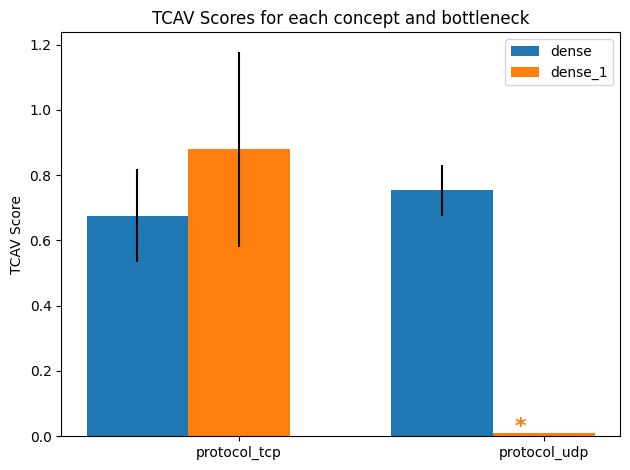

In [18]:
#6 TCAV EXPLAINABILITY
from tcav.utils import create_session
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
from tcav.tcav import TCAV
import absl
absl.logging.set_verbosity(0)

#Normal, Generic, Exploits, Fuzzers, DoS, Reconnaissanc
#Target traffic type
target1 = "Normal"
target2 = "Generic"
target3 = "Exploits"
target4 = "Fuzzers"
target5 = "DoS"
target6 = "Reconnaissance"
#Different layers of the neural network
bottlenecks = ["dense", "dense_1" ]
#Evaluate the importance of the following concepts
concepts_protocol=["protocol_tcp", "protocol_udp"]
concepts=concepts_protocol
#Level of statistical tests to be performed
alphas = [0.1]

#files (CAV:  measure the sensitivity if a given bottleneck to a given concept)
#are stored in cav_dir
my_tcav1 = TCAV(create_session,
                   target1,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results1 = my_tcav1.run()

my_tcav2 = TCAV(create_session,
                   target2,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results2 = my_tcav2.run()

my_tcav3 = TCAV(create_session,
                   target3,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results3 = my_tcav3.run()

my_tcav4 = TCAV(create_session,
                   target4,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results4 = my_tcav4.run()

my_tcav5 = TCAV(create_session,
                   target5,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results5 = my_tcav5.run()

my_tcav6 = TCAV(create_session,
                   target6,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results6 = my_tcav6.run()


utils_plot.plot_results(results1, num_random_exp=10)
utils_plot.plot_results(results2, num_random_exp=10)
utils_plot.plot_results(results3, num_random_exp=10)
utils_plot.plot_results(results4, num_random_exp=10)
utils_plot.plot_results(results5, num_random_exp=10)
utils_plot.plot_results(results6, num_random_exp=10)

Class = Normal
  Concept = service_dns
    Bottleneck = dense. TCAV Score = 0.18 (+- 0.08), random was 0.49 (+- 0.25). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.25 (+- 0.21), random was 0.47 (+- 0.37). p-val = 0.080 (not significant)
  Concept = service_http
    Bottleneck = dense. TCAV Score = 0.32 (+- 0.17), random was 0.49 (+- 0.25). p-val = 0.047 (significant)
    Bottleneck = dense_1. TCAV Score = 0.24 (+- 0.26), random was 0.47 (+- 0.37). p-val = 0.064 (not significant)
{'dense': {'bn_vals': [0.178, 0.32199999999999995], 'bn_stds': [0.08376156636548769, 0.1693989374228776], 'significant': [True, True]}, 'dense_1': {'bn_vals': [0.01, 0.01], 'bn_stds': [0, 0], 'significant': [False, False]}}


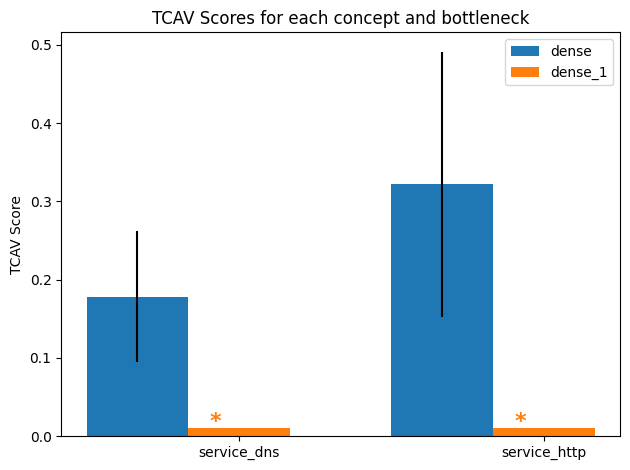

Class = Generic
  Concept = service_dns
    Bottleneck = dense. TCAV Score = 0.51 (+- 0.32), random was 0.57 (+- 0.41). p-val = 0.649 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.43 (+- 0.47), random was 0.48 (+- 0.47). p-val = 0.738 (not significant)
  Concept = service_http
    Bottleneck = dense. TCAV Score = 0.56 (+- 0.30), random was 0.57 (+- 0.41). p-val = 0.902 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.22 (+- 0.32), random was 0.48 (+- 0.47). p-val = 0.102 (not significant)
{'dense': {'bn_vals': [0.01, 0.01], 'bn_stds': [0, 0], 'significant': [False, False]}, 'dense_1': {'bn_vals': [0.01, 0.01], 'bn_stds': [0, 0], 'significant': [False, False]}}


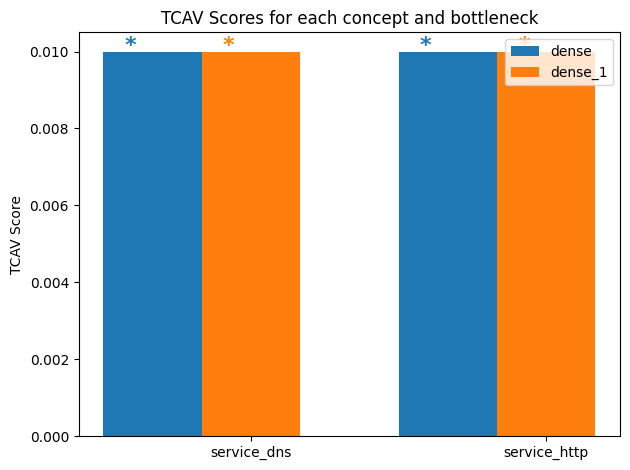

Class = Exploits
  Concept = service_dns
    Bottleneck = dense. TCAV Score = 0.85 (+- 0.07), random was 0.50 (+- 0.34). p-val = 0.002 (significant)
    Bottleneck = dense_1. TCAV Score = 0.70 (+- 0.46), random was 0.53 (+- 0.45). p-val = 0.282 (not significant)
  Concept = service_http
    Bottleneck = dense. TCAV Score = 0.83 (+- 0.11), random was 0.50 (+- 0.34). p-val = 0.003 (significant)
    Bottleneck = dense_1. TCAV Score = 0.92 (+- 0.24), random was 0.53 (+- 0.45). p-val = 0.011 (significant)
{'dense': {'bn_vals': [0.85, 0.8314999999999999], 'bn_stds': [0.06674578638386097, 0.11296127655086056], 'significant': [True, True]}, 'dense_1': {'bn_vals': [0.01, 0.9185000000000001], 'bn_stds': [0, 0.24449999999999997], 'significant': [False, True]}}


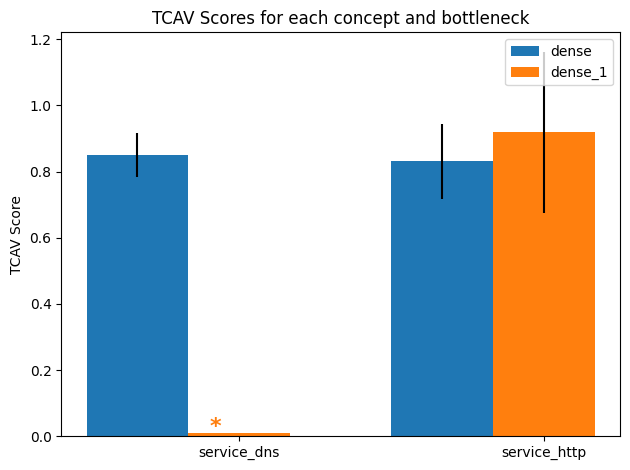

Class = Fuzzers
  Concept = service_dns
    Bottleneck = dense. TCAV Score = 0.84 (+- 0.11), random was 0.47 (+- 0.31). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.62 (+- 0.42), random was 0.47 (+- 0.43). p-val = 0.286 (not significant)
  Concept = service_http
    Bottleneck = dense. TCAV Score = 0.53 (+- 0.28), random was 0.47 (+- 0.31). p-val = 0.563 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.85 (+- 0.28), random was 0.47 (+- 0.43). p-val = 0.008 (significant)
{'dense': {'bn_vals': [0.845, 0.01], 'bn_stds': [0.10571187255932984, 0], 'significant': [True, False]}, 'dense_1': {'bn_vals': [0.01, 0.85], 'bn_stds': [0, 0.281336097932704], 'significant': [False, True]}}


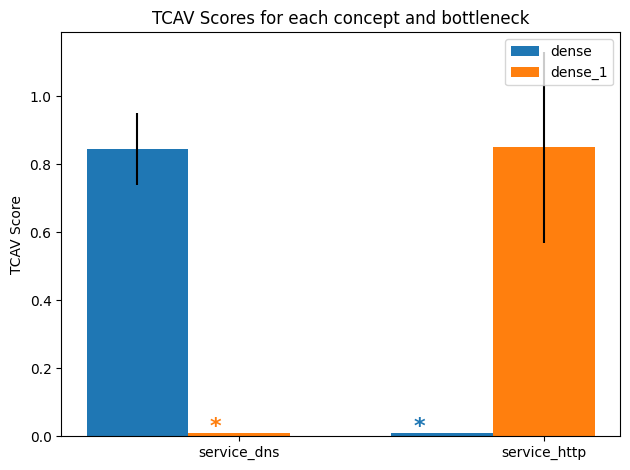

Class = DoS
  Concept = service_dns
    Bottleneck = dense. TCAV Score = 0.77 (+- 0.19), random was 0.46 (+- 0.32). p-val = 0.004 (significant)
    Bottleneck = dense_1. TCAV Score = 0.70 (+- 0.46), random was 0.51 (+- 0.46). p-val = 0.230 (not significant)
  Concept = service_http
    Bottleneck = dense. TCAV Score = 0.65 (+- 0.20), random was 0.46 (+- 0.32). p-val = 0.081 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.46 (+- 0.38), random was 0.51 (+- 0.46). p-val = 0.727 (not significant)
{'dense': {'bn_vals': [0.7745, 0.01], 'bn_stds': [0.1853031300329274, 0], 'significant': [True, False]}, 'dense_1': {'bn_vals': [0.01, 0.01], 'bn_stds': [0, 0], 'significant': [False, False]}}


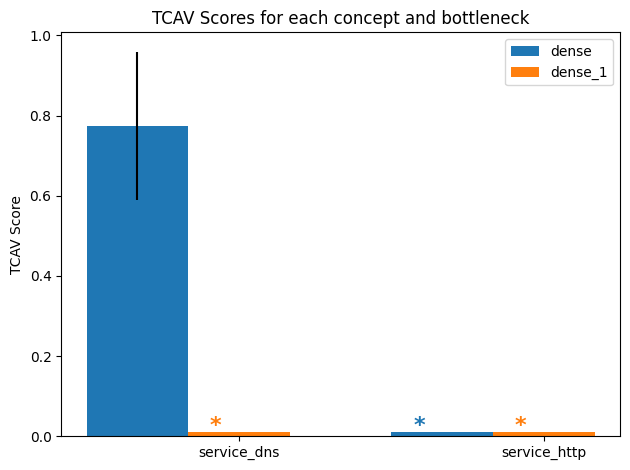

Class = Reconnaissance
  Concept = service_dns
    Bottleneck = dense. TCAV Score = 0.56 (+- 0.13), random was 0.50 (+- 0.25). p-val = 0.445 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.68 (+- 0.34), random was 0.46 (+- 0.42). p-val = 0.124 (not significant)
  Concept = service_http
    Bottleneck = dense. TCAV Score = 0.70 (+- 0.23), random was 0.50 (+- 0.25). p-val = 0.014 (significant)
    Bottleneck = dense_1. TCAV Score = 0.70 (+- 0.40), random was 0.46 (+- 0.42). p-val = 0.089 (not significant)
{'dense': {'bn_vals': [0.01, 0.7030000000000001], 'bn_stds': [0, 0.22718054494168288], 'significant': [False, True]}, 'dense_1': {'bn_vals': [0.01, 0.01], 'bn_stds': [0, 0], 'significant': [False, False]}}


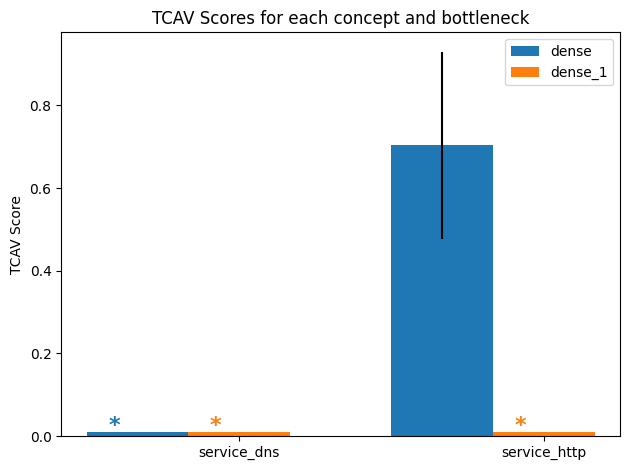

In [19]:
from tcav.utils import create_session
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
from tcav.tcav import TCAV
import absl
absl.logging.set_verbosity(0)

#Target traffic type
target1 = "Normal"
target2 = "Generic"
target3 = "Exploits"
target4 = "Fuzzers"
target5 = "DoS"
target6 = "Reconnaissance"

#Different layers of the neural network
bottlenecks = ["dense", "dense_1" ]
#Evaluate the importance of the following concepts
concepts_service=["service_dns",  "service_http"]
concepts=concepts_service
#Level of statistical tests to be performed
alphas = [0.1]



my_tcav1 = TCAV(create_session,
                   target1,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results1 = my_tcav1.run()

my_tcav2 = TCAV(create_session,
                   target2,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results2 = my_tcav2.run()

my_tcav3 = TCAV(create_session,
                   target3,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results3 = my_tcav3.run()

my_tcav4 = TCAV(create_session,
                   target4,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results4 = my_tcav4.run()

my_tcav5 = TCAV(create_session,
                   target5,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results5 = my_tcav5.run()

my_tcav6 = TCAV(create_session,
                   target6,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results6 = my_tcav6.run()

utils_plot.plot_results(results1, num_random_exp=10)
utils_plot.plot_results(results2, num_random_exp=10)
utils_plot.plot_results(results3, num_random_exp=10)
utils_plot.plot_results(results4, num_random_exp=10)
utils_plot.plot_results(results5, num_random_exp=10)
utils_plot.plot_results(results6, num_random_exp=10)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Class = Normal
  Concept = state_fin
    Bottleneck = dense. TCAV Score = 0.37 (+- 0.23), random was 0.49 (+- 0.25). p-val = 0.153 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.21 (+- 0.35), random was 0.47 (+- 0.37). p-val = 0.041 (significant)
  Concept = state_int
    Bottleneck = dense. TCAV Score = 0.85 (+- 0.00), random was 0.49 (+- 0.25). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.92 (+- 0.03), random was 0.47 (+- 0.37). p-val = 0.000 (significant)
  Concept = state_con
    Bottleneck = dense. TCAV Score = 0.28 (+- 0.11), random was 0.49 (+- 0.25). p-val = 0.012 (significant)
    Bottleneck = dense_1. TCAV Score = 0.41 (+- 0.31), random was 0.47 (+- 0.37). p-val = 0.625 (not significant)
  Concept = state_req
    Bottleneck = dense. TCAV Score = 0.96 (+- 0.00), random was 0.49 (+- 0.25). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.73 (+- 0.31), random was 0.47 (+- 0.37). p-val = 0.032 (significant)
{'dense': {'bn_va

/usr/local/lib/python3.10/dist-packages/tcav/utils_plot.py:96: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  _, p_val = ttest_ind(random_i_ups[bottleneck], i_ups)


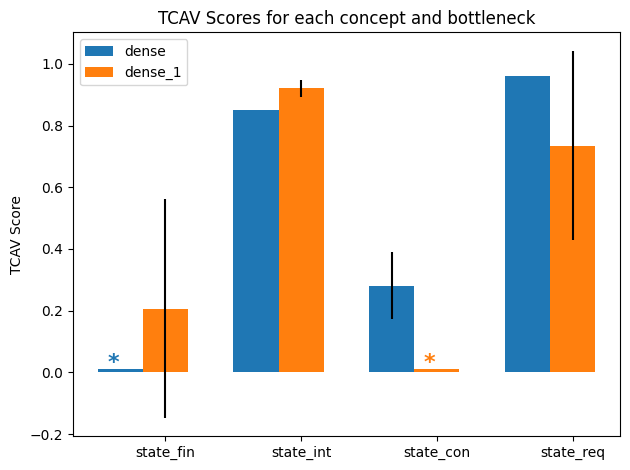

Class = Generic
  Concept = state_fin
    Bottleneck = dense. TCAV Score = 0.59 (+- 0.33), random was 0.57 (+- 0.41). p-val = 0.924 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.50 (+- 0.45), random was 0.48 (+- 0.47). p-val = 0.901 (not significant)
  Concept = state_int
    Bottleneck = dense. TCAV Score = 1.00 (+- 0.00), random was 0.57 (+- 0.41). p-val = 0.002 (significant)
    Bottleneck = dense_1. TCAV Score = 0.09 (+- 0.23), random was 0.48 (+- 0.47). p-val = 0.012 (significant)
  Concept = state_con
    Bottleneck = dense. TCAV Score = 0.10 (+- 0.23), random was 0.57 (+- 0.41). p-val = 0.001 (significant)
    Bottleneck = dense_1. TCAV Score = 0.20 (+- 0.40), random was 0.48 (+- 0.47). p-val = 0.077 (not significant)
  Concept = state_req
    Bottleneck = dense. TCAV Score = 0.56 (+- 0.00), random was 0.57 (+- 0.41). p-val = 0.941 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.76 (+- 0.39), random was 0.48 (+- 0.47). p-val = 0.081 (not significant)
{'de

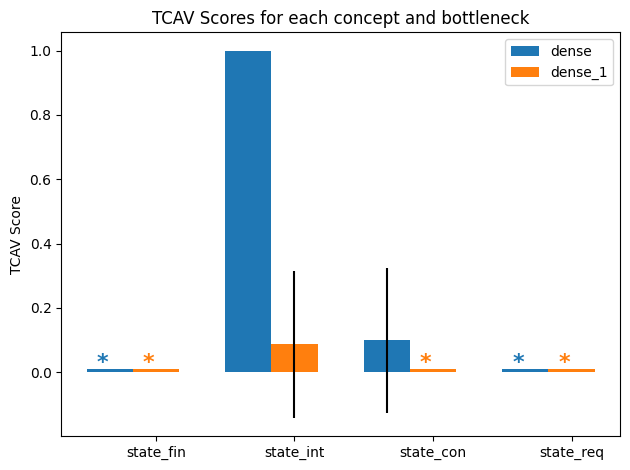

Class = Exploits
  Concept = state_fin
    Bottleneck = dense. TCAV Score = 0.85 (+- 0.14), random was 0.50 (+- 0.34). p-val = 0.002 (significant)
    Bottleneck = dense_1. TCAV Score = 0.82 (+- 0.31), random was 0.53 (+- 0.45). p-val = 0.054 (not significant)
  Concept = state_int
    Bottleneck = dense. TCAV Score = 0.06 (+- 0.00), random was 0.50 (+- 0.34). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.01 (+- 0.04), random was 0.53 (+- 0.45). p-val = 0.001 (significant)
  Concept = state_con
    Bottleneck = dense. TCAV Score = 0.77 (+- 0.16), random was 0.50 (+- 0.34). p-val = 0.016 (significant)
    Bottleneck = dense_1. TCAV Score = 0.98 (+- 0.04), random was 0.53 (+- 0.45). p-val = 0.003 (significant)
  Concept = state_req
    Bottleneck = dense. TCAV Score = 0.04 (+- 0.00), random was 0.50 (+- 0.34). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.28 (+- 0.36), random was 0.53 (+- 0.45). p-val = 0.099 (not significant)
{'dense': {'bn_

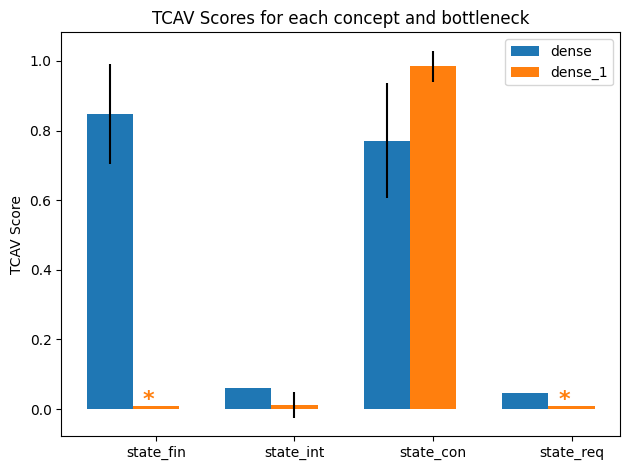

Class = Fuzzers
  Concept = state_fin
    Bottleneck = dense. TCAV Score = 0.50 (+- 0.34), random was 0.47 (+- 0.31). p-val = 0.777 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.70 (+- 0.38), random was 0.47 (+- 0.43). p-val = 0.107 (not significant)
  Concept = state_int
    Bottleneck = dense. TCAV Score = 0.07 (+- 0.00), random was 0.47 (+- 0.31). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.05 (+- 0.00), random was 0.47 (+- 0.43). p-val = 0.004 (significant)
  Concept = state_con
    Bottleneck = dense. TCAV Score = 0.79 (+- 0.11), random was 0.47 (+- 0.31). p-val = 0.002 (significant)
    Bottleneck = dense_1. TCAV Score = 0.41 (+- 0.39), random was 0.47 (+- 0.43). p-val = 0.710 (not significant)
  Concept = state_req
    Bottleneck = dense. TCAV Score = 0.04 (+- 0.00), random was 0.47 (+- 0.31). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.11 (+- 0.27), random was 0.47 (+- 0.43). p-val = 0.012 (significant)
{'dense': {'

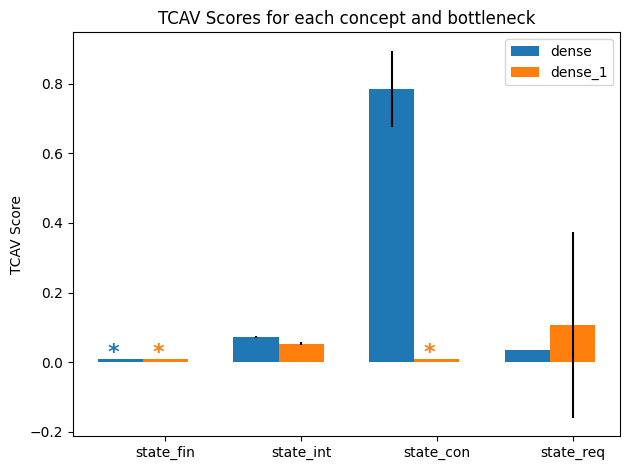

Class = DoS
  Concept = state_fin
    Bottleneck = dense. TCAV Score = 0.63 (+- 0.21), random was 0.46 (+- 0.32). p-val = 0.114 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.50 (+- 0.44), random was 0.51 (+- 0.46). p-val = 0.901 (not significant)
  Concept = state_int
    Bottleneck = dense. TCAV Score = 0.01 (+- 0.00), random was 0.46 (+- 0.32). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.02 (+- 0.02), random was 0.51 (+- 0.46). p-val = 0.001 (significant)
  Concept = state_con
    Bottleneck = dense. TCAV Score = 0.81 (+- 0.18), random was 0.46 (+- 0.32). p-val = 0.001 (significant)
    Bottleneck = dense_1. TCAV Score = 0.87 (+- 0.30), random was 0.51 (+- 0.46). p-val = 0.019 (significant)
  Concept = state_req
    Bottleneck = dense. TCAV Score = 0.03 (+- 0.00), random was 0.46 (+- 0.32). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.19 (+- 0.29), random was 0.51 (+- 0.46). p-val = 0.031 (significant)
{'dense': {'bn_vals'

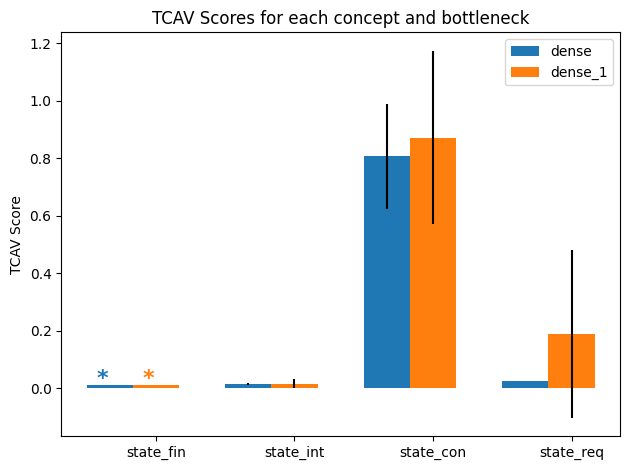

Class = Reconnaissance
  Concept = state_fin
    Bottleneck = dense. TCAV Score = 0.62 (+- 0.28), random was 0.50 (+- 0.25). p-val = 0.132 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.87 (+- 0.27), random was 0.46 (+- 0.42). p-val = 0.004 (significant)
  Concept = state_int
    Bottleneck = dense. TCAV Score = 0.01 (+- 0.00), random was 0.50 (+- 0.25). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.00 (+- 0.00), random was 0.46 (+- 0.42). p-val = 0.001 (significant)
  Concept = state_con
    Bottleneck = dense. TCAV Score = 0.45 (+- 0.08), random was 0.50 (+- 0.25). p-val = 0.587 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.58 (+- 0.32), random was 0.46 (+- 0.42). p-val = 0.371 (not significant)
  Concept = state_req
    Bottleneck = dense. TCAV Score = 0.06 (+- 0.00), random was 0.50 (+- 0.25). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.35 (+- 0.37), random was 0.46 (+- 0.42). p-val = 0.419 (not significant)
{

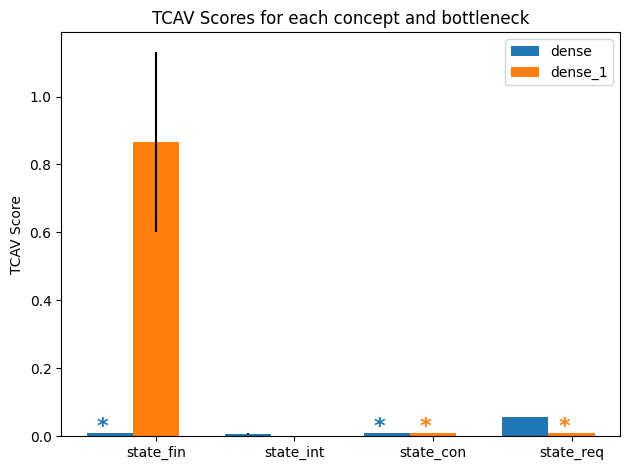

In [20]:
from tcav.utils import create_session
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
from tcav.tcav import TCAV
import absl
absl.logging.set_verbosity(0)

#Normal, Generic, Exploits, Fuzzers, DoS, Reconnaissance
#Target traffic type
target1_state = "Normal"
target2_state = "Generic"
target3_state = "Exploits"
target4_state = "Fuzzers"
target5_state = "DoS"
target6_state = "Reconnaissance"

#Different layers of the neural network
bottlenecks = ["dense", "dense_1" ]
#Evaluate the importance of the following concepts
concepts_state=["state_fin",  "state_int", "state_con", "state_req"]
concepts=concepts_state
#Level of statistical tests to be performed
alphas = [0.1]



my_tcav1 = TCAV(create_session,
                   target1,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results1 = my_tcav1.run()

my_tcav2 = TCAV(create_session,
                   target2,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results2 = my_tcav2.run()

my_tcav3 = TCAV(create_session,
                   target3,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results3 = my_tcav3.run()

my_tcav4 = TCAV(create_session,
                   target4,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results4 = my_tcav4.run()

my_tcav5 = TCAV(create_session,
                   target5,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results5 = my_tcav5.run()

my_tcav6 = TCAV(create_session,
                   target6,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results6 = my_tcav6.run()

utils_plot.plot_results(results1, num_random_exp=10)
utils_plot.plot_results(results2, num_random_exp=10)
utils_plot.plot_results(results3, num_random_exp=10)
utils_plot.plot_results(results4, num_random_exp=10)
utils_plot.plot_results(results5, num_random_exp=10)
utils_plot.plot_results(results6, num_random_exp=10)

Class = Normal
  Concept = sttl_big
    Bottleneck = dense. TCAV Score = 0.15 (+- 0.11), random was 0.49 (+- 0.25). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.64 (+- 0.38), random was 0.47 (+- 0.37). p-val = 0.180 (not significant)
  Concept = sttl_small
    Bottleneck = dense. TCAV Score = 0.67 (+- 0.18), random was 0.49 (+- 0.25). p-val = 0.024 (significant)
    Bottleneck = dense_1. TCAV Score = 0.86 (+- 0.25), random was 0.47 (+- 0.37). p-val = 0.002 (significant)
  Concept = sttl_medium
    Bottleneck = dense. TCAV Score = 0.41 (+- 0.18), random was 0.49 (+- 0.25). p-val = 0.337 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.21 (+- 0.29), random was 0.47 (+- 0.37). p-val = 0.038 (significant)
{'dense': {'bn_vals': [0.14900000000000002, 0.673, 0.01], 'bn_stds': [0.11141813137905338, 0.17672294701028501, 0], 'significant': [True, True, False]}, 'dense_1': {'bn_vals': [0.01, 0.8605, 0.20600000000000002], 'bn_stds': [0, 0.2536971619864912, 0.29432

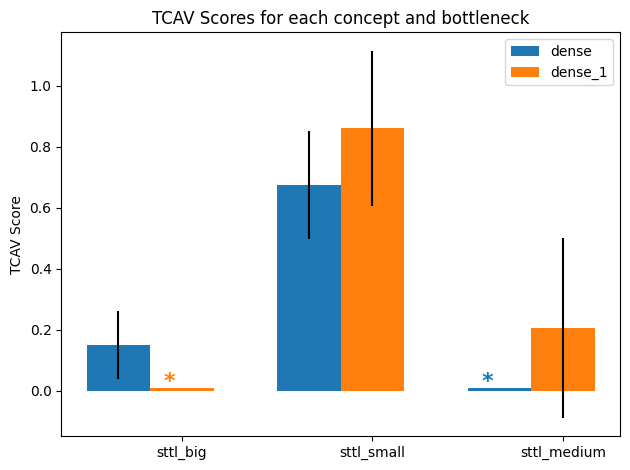

Class = Generic
  Concept = sttl_big
    Bottleneck = dense. TCAV Score = 0.02 (+- 0.01), random was 0.57 (+- 0.41). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.00 (+- 0.00), random was 0.48 (+- 0.47). p-val = 0.002 (significant)
  Concept = sttl_small
    Bottleneck = dense. TCAV Score = 0.54 (+- 0.37), random was 0.57 (+- 0.41). p-val = 0.779 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.17 (+- 0.33), random was 0.48 (+- 0.47). p-val = 0.053 (not significant)
  Concept = sttl_medium
    Bottleneck = dense. TCAV Score = 0.71 (+- 0.34), random was 0.57 (+- 0.41). p-val = 0.340 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.33 (+- 0.45), random was 0.48 (+- 0.47). p-val = 0.340 (not significant)
{'dense': {'bn_vals': [0.017499999999999998, 0.01, 0.01], 'bn_stds': [0.0075, 0, 0], 'significant': [True, False, False]}, 'dense_1': {'bn_vals': [0.0, 0.01, 0.01], 'bn_stds': [0.0, 0, 0], 'significant': [True, False, False]}}


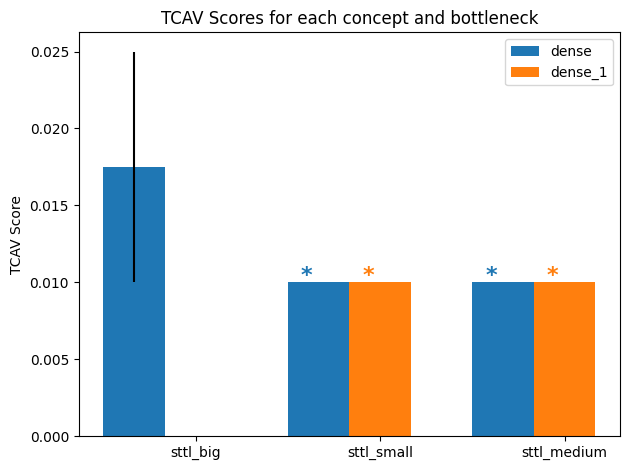

Class = Exploits
  Concept = sttl_big
    Bottleneck = dense. TCAV Score = 0.83 (+- 0.24), random was 0.50 (+- 0.34). p-val = 0.004 (significant)
    Bottleneck = dense_1. TCAV Score = 0.53 (+- 0.39), random was 0.53 (+- 0.45). p-val = 0.959 (not significant)
  Concept = sttl_small
    Bottleneck = dense. TCAV Score = 0.43 (+- 0.26), random was 0.50 (+- 0.34). p-val = 0.489 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.26 (+- 0.20), random was 0.53 (+- 0.45). p-val = 0.061 (not significant)
  Concept = sttl_medium
    Bottleneck = dense. TCAV Score = 0.73 (+- 0.19), random was 0.50 (+- 0.34). p-val = 0.037 (significant)
    Bottleneck = dense_1. TCAV Score = 0.95 (+- 0.12), random was 0.53 (+- 0.45). p-val = 0.005 (significant)
{'dense': {'bn_vals': [0.8314999999999999, 0.01, 0.7344999999999999], 'bn_stds': [0.24219878199528583, 0, 0.18683482009518462], 'significant': [True, False, True]}, 'dense_1': {'bn_vals': [0.01, 0.01, 0.9545], 'bn_stds': [0, 0, 0.1207569873754724], 

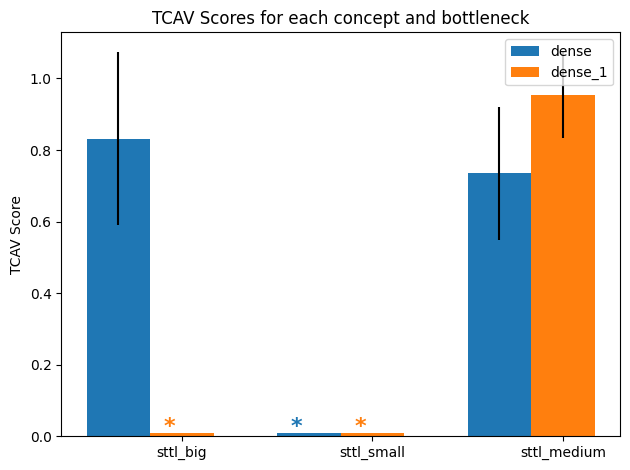

Class = Fuzzers
  Concept = sttl_big
    Bottleneck = dense. TCAV Score = 0.92 (+- 0.11), random was 0.47 (+- 0.31). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.63 (+- 0.45), random was 0.47 (+- 0.43). p-val = 0.272 (not significant)
  Concept = sttl_small
    Bottleneck = dense. TCAV Score = 0.19 (+- 0.16), random was 0.47 (+- 0.31). p-val = 0.005 (significant)
    Bottleneck = dense_1. TCAV Score = 0.01 (+- 0.01), random was 0.47 (+- 0.43). p-val = 0.001 (significant)
  Concept = sttl_medium
    Bottleneck = dense. TCAV Score = 0.45 (+- 0.25), random was 0.47 (+- 0.31). p-val = 0.811 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.67 (+- 0.42), random was 0.47 (+- 0.43). p-val = 0.177 (not significant)
{'dense': {'bn_vals': [0.923, 0.187, 0.01], 'bn_stds': [0.10856334556377671, 0.16118622769951532, 0], 'significant': [True, True, False]}, 'dense_1': {'bn_vals': [0.01, 0.005, 0.01], 'bn_stds': [0, 0.007071067811865475, 0], 'significant': [False, Tru

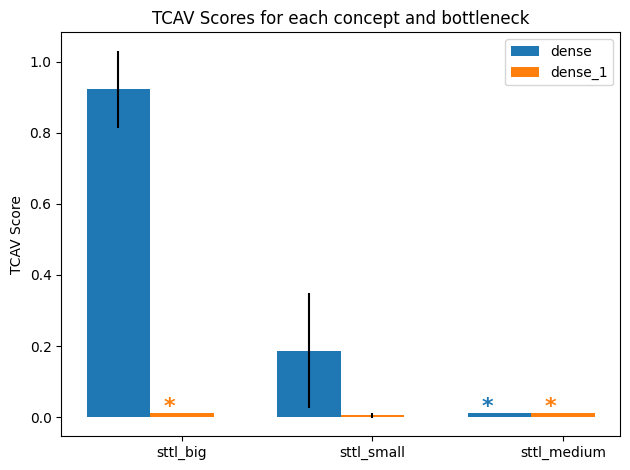

Class = DoS
  Concept = sttl_big
    Bottleneck = dense. TCAV Score = 0.90 (+- 0.19), random was 0.46 (+- 0.32). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.19 (+- 0.21), random was 0.51 (+- 0.46). p-val = 0.032 (significant)
  Concept = sttl_small
    Bottleneck = dense. TCAV Score = 0.35 (+- 0.20), random was 0.46 (+- 0.32). p-val = 0.287 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.11 (+- 0.28), random was 0.51 (+- 0.46). p-val = 0.008 (significant)
  Concept = sttl_medium
    Bottleneck = dense. TCAV Score = 0.60 (+- 0.14), random was 0.46 (+- 0.32). p-val = 0.183 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.63 (+- 0.39), random was 0.51 (+- 0.46). p-val = 0.455 (not significant)
{'dense': {'bn_vals': [0.9025000000000001, 0.01, 0.01], 'bn_stds': [0.19438685655156834, 0, 0], 'significant': [True, False, False]}, 'dense_1': {'bn_vals': [0.1935, 0.1075, 0.01], 'bn_stds': [0.2122739974655398, 0.27991293289164043, 0], 'significant': [

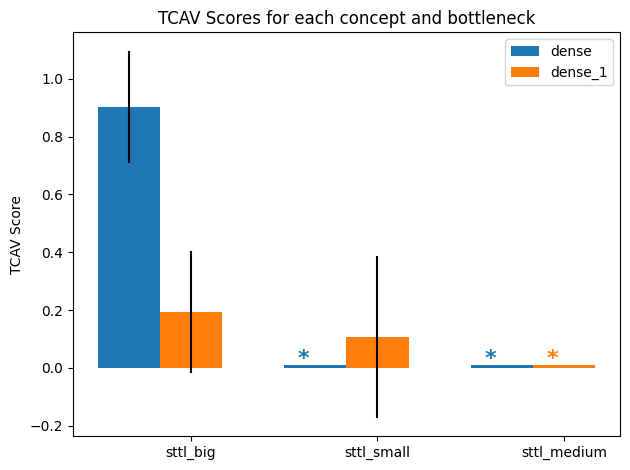

Class = Reconnaissance
  Concept = sttl_big
    Bottleneck = dense. TCAV Score = 0.80 (+- 0.11), random was 0.50 (+- 0.25). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.19 (+- 0.24), random was 0.46 (+- 0.42). p-val = 0.048 (significant)
  Concept = sttl_small
    Bottleneck = dense. TCAV Score = 0.43 (+- 0.26), random was 0.50 (+- 0.25). p-val = 0.430 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.18 (+- 0.31), random was 0.46 (+- 0.42). p-val = 0.044 (significant)
  Concept = sttl_medium
    Bottleneck = dense. TCAV Score = 0.66 (+- 0.16), random was 0.50 (+- 0.25). p-val = 0.047 (significant)
    Bottleneck = dense_1. TCAV Score = 0.78 (+- 0.36), random was 0.46 (+- 0.42). p-val = 0.025 (significant)
{'dense': {'bn_vals': [0.8024999999999999, 0.01, 0.6585000000000001], 'bn_stds': [0.10932177276279414, 0, 0.1643935825998083], 'significant': [True, False, True]}, 'dense_1': {'bn_vals': [0.186, 0.1765, 0.778], 'bn_stds': [0.2389853551998532, 0.309887

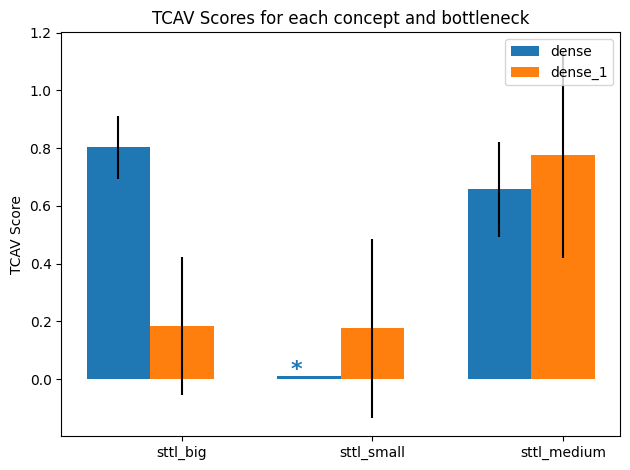

In [21]:
from tcav.utils import create_session
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
from tcav.tcav import TCAV
import absl
absl.logging.set_verbosity(0)

#Normal, Generic, Exploits, Fuzzers, DoS, Reconnaissance
#Target traffic type
target1 = "Normal"
target2 = "Generic"
target3 = "Exploits"
target4 = "Fuzzers"
target5 = "DoS"
target6 = "Reconnaissance"

#Different layers of the neural network
bottlenecks = ["dense", "dense_1" ]
#Evaluate the importance of the following concepts
concepts_sttl=["sttl_big",  "sttl_small", "sttl_medium"]
concepts=concepts_sttl
#Level of statistical tests to be performed
alphas = [0.1]

my_tcav1 = TCAV(create_session,
                   target1,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results1 = my_tcav1.run()

my_tcav2 = TCAV(create_session,
                   target2,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results2 = my_tcav2.run()

my_tcav3 = TCAV(create_session,
                   target3,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results3 = my_tcav3.run()

my_tcav4 = TCAV(create_session,
                   target4,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results4 = my_tcav4.run()

my_tcav5 = TCAV(create_session,
                   target5,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results5 = my_tcav5.run()

my_tcav6 = TCAV(create_session,
                   target6,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results6 = my_tcav6.run()

utils_plot.plot_results(results1, num_random_exp=10)
utils_plot.plot_results(results2, num_random_exp=10)
utils_plot.plot_results(results3, num_random_exp=10)
utils_plot.plot_results(results4, num_random_exp=10)
utils_plot.plot_results(results5, num_random_exp=10)
utils_plot.plot_results(results6, num_random_exp=10)

Class = Normal
  Concept = dttl_null
    Bottleneck = dense. TCAV Score = 0.85 (+- 0.00), random was 0.49 (+- 0.25). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.74 (+- 0.33), random was 0.47 (+- 0.37). p-val = 0.031 (significant)
  Concept = dttl_big
    Bottleneck = dense. TCAV Score = 0.37 (+- 0.16), random was 0.49 (+- 0.25). p-val = 0.140 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.35 (+- 0.38), random was 0.47 (+- 0.37). p-val = 0.367 (not significant)
  Concept = dttl_medium
    Bottleneck = dense. TCAV Score = 0.64 (+- 0.19), random was 0.49 (+- 0.25). p-val = 0.056 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.71 (+- 0.34), random was 0.47 (+- 0.37). p-val = 0.050 (significant)
{'dense': {'bn_vals': [0.85, 0.01, 0.01], 'bn_stds': [0.0, 0, 0], 'significant': [True, False, False]}, 'dense_1': {'bn_vals': [0.7375, 0.01, 0.7135], 'bn_stds': [0.3347032267546879, 0, 0.34452902635336835], 'significant': [True, False, True]}}


/usr/local/lib/python3.10/dist-packages/tcav/utils_plot.py:96: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  _, p_val = ttest_ind(random_i_ups[bottleneck], i_ups)


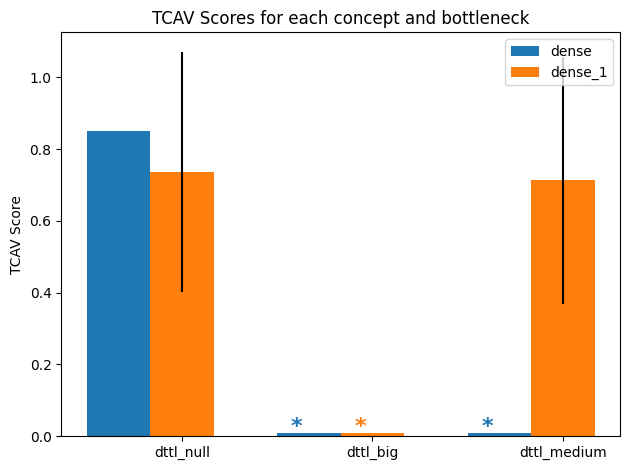

Class = Generic
  Concept = dttl_null
    Bottleneck = dense. TCAV Score = 1.00 (+- 0.00), random was 0.57 (+- 0.41). p-val = 0.002 (significant)
    Bottleneck = dense_1. TCAV Score = 0.05 (+- 0.09), random was 0.48 (+- 0.47). p-val = 0.005 (significant)
  Concept = dttl_big
    Bottleneck = dense. TCAV Score = 0.77 (+- 0.25), random was 0.57 (+- 0.41). p-val = 0.146 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.30 (+- 0.46), random was 0.48 (+- 0.47). p-val = 0.276 (not significant)
  Concept = dttl_medium
    Bottleneck = dense. TCAV Score = 0.65 (+- 0.31), random was 0.57 (+- 0.41). p-val = 0.598 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.39 (+- 0.47), random was 0.48 (+- 0.47). p-val = 0.598 (not significant)
{'dense': {'bn_vals': [1.0, 0.01, 0.01], 'bn_stds': [0.0, 0, 0], 'significant': [True, False, False]}, 'dense_1': {'bn_vals': [0.048999999999999995, 0.01, 0.01], 'bn_stds': [0.08805679985100526, 0, 0], 'significant': [True, False, False]}}


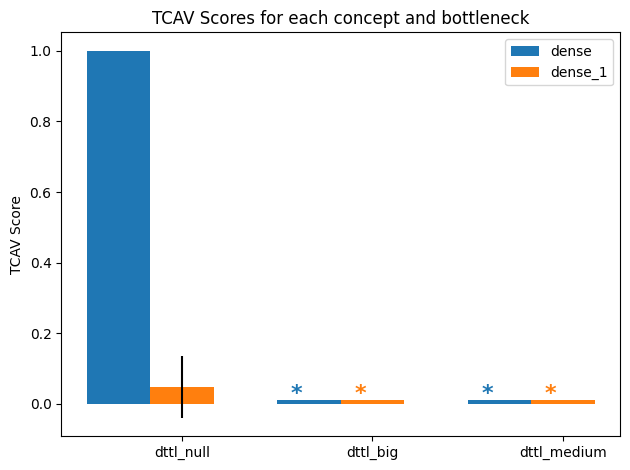

Class = Exploits
  Concept = dttl_null
    Bottleneck = dense. TCAV Score = 0.06 (+- 0.01), random was 0.50 (+- 0.34). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.20 (+- 0.40), random was 0.53 (+- 0.45). p-val = 0.029 (significant)
  Concept = dttl_big
    Bottleneck = dense. TCAV Score = 0.83 (+- 0.13), random was 0.50 (+- 0.34). p-val = 0.003 (significant)
    Bottleneck = dense_1. TCAV Score = 0.87 (+- 0.25), random was 0.53 (+- 0.45). p-val = 0.024 (significant)
  Concept = dttl_medium
    Bottleneck = dense. TCAV Score = 0.48 (+- 0.26), random was 0.50 (+- 0.34). p-val = 0.832 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.42 (+- 0.39), random was 0.53 (+- 0.45). p-val = 0.449 (not significant)
{'dense': {'bn_vals': [0.0645, 0.8324999999999999, 0.01], 'bn_stds': [0.0135, 0.12907846450899546, 0], 'significant': [True, True, False]}, 'dense_1': {'bn_vals': [0.2, 0.8720000000000001, 0.01], 'bn_stds': [0.4000000000000001, 0.2485377234948449, 0], 's

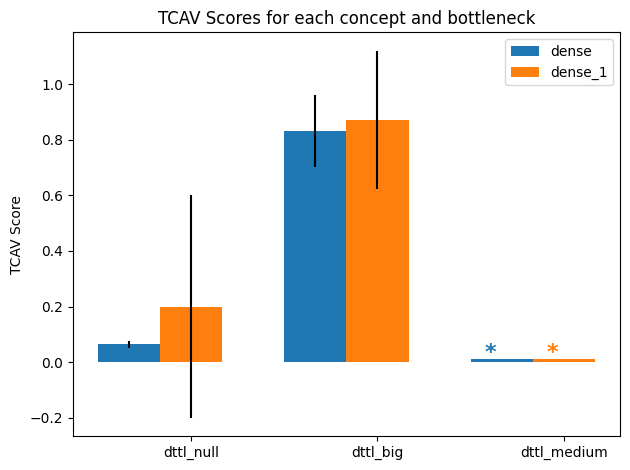

Class = Fuzzers
  Concept = dttl_null
    Bottleneck = dense. TCAV Score = 0.07 (+- 0.00), random was 0.47 (+- 0.31). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.23 (+- 0.36), random was 0.47 (+- 0.43). p-val = 0.107 (not significant)
  Concept = dttl_big
    Bottleneck = dense. TCAV Score = 0.53 (+- 0.18), random was 0.47 (+- 0.31). p-val = 0.543 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.52 (+- 0.45), random was 0.47 (+- 0.43). p-val = 0.702 (not significant)
  Concept = dttl_medium
    Bottleneck = dense. TCAV Score = 0.14 (+- 0.08), random was 0.47 (+- 0.31). p-val = 0.001 (significant)
    Bottleneck = dense_1. TCAV Score = 0.10 (+- 0.25), random was 0.47 (+- 0.43). p-val = 0.010 (significant)
{'dense': {'bn_vals': [0.07250000000000001, 0.01, 0.1355], 'bn_stds': [0.0024999999999999953, 0, 0.07827675261531995], 'significant': [True, False, True]}, 'dense_1': {'bn_vals': [0.01, 0.01, 0.0975], 'bn_stds': [0, 0, 0.25447249360196084], 'significa

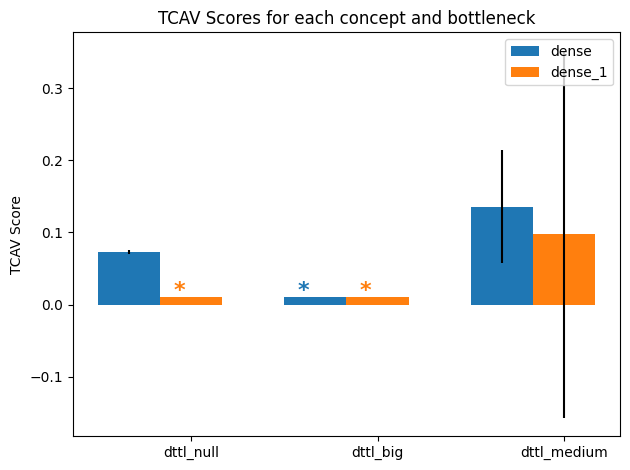

Class = DoS
  Concept = dttl_null
    Bottleneck = dense. TCAV Score = 0.01 (+- 0.01), random was 0.46 (+- 0.32). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.17 (+- 0.35), random was 0.51 (+- 0.46). p-val = 0.026 (significant)
  Concept = dttl_big
    Bottleneck = dense. TCAV Score = 0.50 (+- 0.22), random was 0.46 (+- 0.32). p-val = 0.690 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.39 (+- 0.38), random was 0.51 (+- 0.46). p-val = 0.408 (not significant)
  Concept = dttl_medium
    Bottleneck = dense. TCAV Score = 0.36 (+- 0.26), random was 0.46 (+- 0.32). p-val = 0.343 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.36 (+- 0.45), random was 0.51 (+- 0.46). p-val = 0.320 (not significant)
{'dense': {'bn_vals': [0.015, 0.01, 0.01], 'bn_stds': [0.006708203932499369, 0, 0], 'significant': [True, False, False]}, 'dense_1': {'bn_vals': [0.1745, 0.01, 0.01], 'bn_stds': [0.34535814743538334, 0, 0], 'significant': [True, False, False]}}


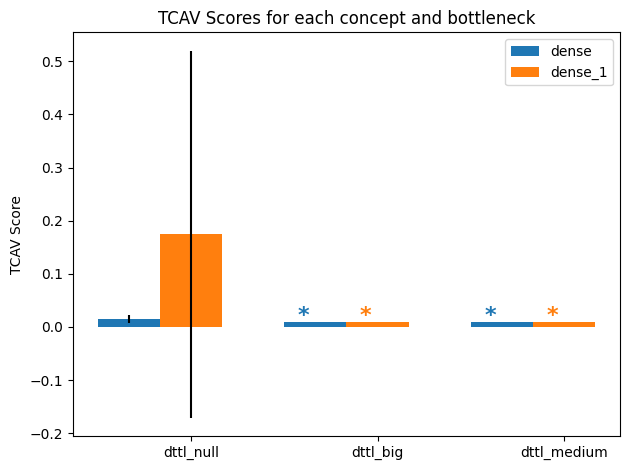

Class = Reconnaissance
  Concept = dttl_null
    Bottleneck = dense. TCAV Score = 0.01 (+- 0.00), random was 0.50 (+- 0.25). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.13 (+- 0.27), random was 0.46 (+- 0.42). p-val = 0.019 (significant)
  Concept = dttl_big
    Bottleneck = dense. TCAV Score = 0.67 (+- 0.17), random was 0.50 (+- 0.25). p-val = 0.030 (significant)
    Bottleneck = dense_1. TCAV Score = 0.76 (+- 0.37), random was 0.46 (+- 0.42). p-val = 0.038 (significant)
  Concept = dttl_medium
    Bottleneck = dense. TCAV Score = 0.42 (+- 0.27), random was 0.50 (+- 0.25). p-val = 0.378 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.51 (+- 0.36), random was 0.46 (+- 0.42). p-val = 0.723 (not significant)
{'dense': {'bn_vals': [0.0085, 0.674, 0.01], 'bn_stds': [0.0032015621187164245, 0.16805951326836574, 0], 'significant': [True, True, False]}, 'dense_1': {'bn_vals': [0.131, 0.7555000000000001, 0.01], 'bn_stds': [0.2683728749333658, 0.37493632792782

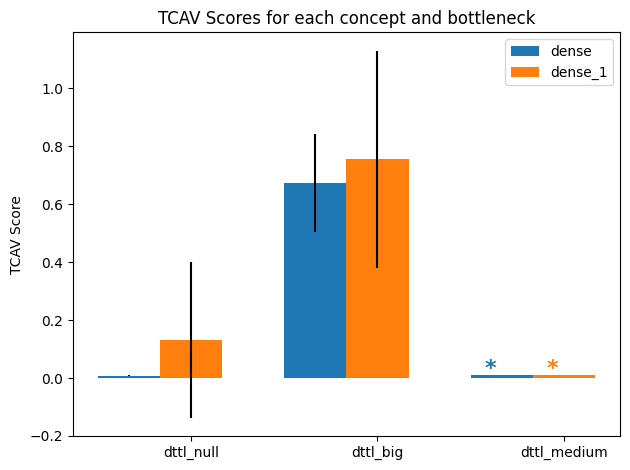

In [22]:
from tcav.utils import create_session
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
from tcav.tcav import TCAV
import absl
absl.logging.set_verbosity(0)

#Normal, Generic, Exploits, Fuzzers, DoS, Reconnaissance
target1 = "Normal"
target2 = "Generic"
target3 = "Exploits"
target4 = "Fuzzers"
target5 = "DoS"
target6 = "Reconnaissance"

#Different layers of the neural network
bottlenecks = ["dense", "dense_1" ]
#Evaluate the importance of the following concepts
concepts_dttl=["dttl_null",  "dttl_big", "dttl_medium"]
concepts=concepts_dttl
#Level of statistical tests to be performed
alphas = [0.1]

my_tcav1 = TCAV(create_session,
                   target1,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results1 = my_tcav1.run()

my_tcav2 = TCAV(create_session,
                   target2,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results2 = my_tcav2.run()

my_tcav3 = TCAV(create_session,
                   target3,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results3 = my_tcav3.run()

my_tcav4 = TCAV(create_session,
                   target4,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results4 = my_tcav4.run()

my_tcav5 = TCAV(create_session,
                   target5,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results5 = my_tcav5.run()

my_tcav6 = TCAV(create_session,
                   target6,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results6 = my_tcav6.run()

utils_plot.plot_results(results1, num_random_exp=10)
utils_plot.plot_results(results2, num_random_exp=10)
utils_plot.plot_results(results3, num_random_exp=10)
utils_plot.plot_results(results4, num_random_exp=10)
utils_plot.plot_results(results5, num_random_exp=10)
utils_plot.plot_results(results6, num_random_exp=10)